<a href="https://colab.research.google.com/github/CarlosCR07/Mineria-de-Datos/blob/main/Apriori.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Minería de datos utilizando el algoritmo de Asociación APRIORI**
Para poder ejecutar el código es necesario cargar de manera local el archivo inicial de datos *Transacciones_ventas.csv* localizado en:
https://drive.google.com/file/d/1FcrWVmvQCR-ltnDTChk5pXax4QJyi7Zw/view?usp=sharing

In [ ]:
from google.colab import data_table
from vega_datasets import data
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
from mlxtend.preprocessing import TransactionEncoder

# ----------------------------
# BASE
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt

# ----------------------------
# TRANSACTION ENCODER
from mlxtend.preprocessing import TransactionEncoder

# ----------------------------
# APRIORI FUNCTION
from mlxtend.frequent_patterns import apriori, association_rules

# ----------------------------
# ITERTOOLS
import itertools

# ----------------------------
# CONFIGURATION
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

pd.set_option('display.max_columns', None)
pd.options.display.float_format = '{:.2f}'.format

# Almacenamiento de datos

In [ ]:
df = pd.read_csv(r"Transacciones_ventas.csv", index_col=0, encoding='latin-1')
dataframe = df
print(dataframe)

        Producto                Descripcion
Pedido                                     
70972         12  PECHUGA DE PAVO 250GR SRF
71013         12  PECHUGA DE PAVO 250GR SRF
71018         12  PECHUGA DE PAVO 250GR SRF
71029         12  PECHUGA DE PAVO 250GR SRF
71100         12  PECHUGA DE PAVO 250GR SRF
...          ...                        ...
94962      17676       JAMON YORK 250GR BER
95280      17676       JAMON YORK 250GR BER
95447      17676       JAMON YORK 250GR BER
95469      17676       JAMON YORK 250GR BER
95501      17676       JAMON YORK 250GR BER

[20807 rows x 2 columns]


# Agrupación de datos

In [ ]:
# Agrupación por producto y descripción
df.groupby('Producto')['Descripcion'].apply(list)

Producto
12       [PECHUGA DE PAVO 250GR SRF, PECHUGA DE PAVO 25...
25       [DELI FRESH PECHUGA DE PAVO HORNEADA, DELI FRE...
26       [DELI FRESH PECHUGA DE PAVO AHUMADA, DELI FRES...
30       [JAMON REAL DE PAVO 300 G MARCA HID, JAMON REA...
116      [PECHUG DE PAVO VIRGINIA 250GR MARCA JAL, PECH...
                               ...                        
17612    [SALCHICHA SCHUBLING 340 GR BER, SALCHICHA SCH...
17618    [JAMON ESTILO HOLANDES 300GR BER, JAMON ESTILO...
17626    [PECHUGA PAV COCIDA/AHUM 300GR BER, PECHUGA PA...
17675    [PECHUGA SIN SAL 200 GR BER, PECHUGA SIN SAL 2...
17676    [JAMON YORK 250GR BER, JAMON YORK 250GR BER, J...
Name: Descripcion, Length: 133, dtype: object

## Formato de lista (basket)

In [ ]:
# Agrupación por pedido y productos adquiridos
df.groupby('Pedido')['Producto'].apply(list)

Pedido
70855                       [26, 943, 985]
70869                           [583, 909]
70872     [30, 585, 606, 5152, 5154, 5157]
70874                            [30, 909]
70877                           [159, 294]
                        ...               
117328                               [234]
117333                    [135, 196, 5170]
117335                    [196, 234, 5170]
117338                               [763]
117442                               [234]
Name: Producto, Length: 8860, dtype: object

In [ ]:
# Agrupación por pedido y descripcioón
df.groupby('Pedido')['Descripcion'].apply(list)

Pedido
70855     [DELI FRESH PECHUGA DE PAVO AHUMADA, SALCHICHA...
70869     [JAMON DE PAVO VIRGINIA MARCA JAL 290 GR, SALC...
70872     [JAMON REAL DE PAVO 300 G MARCA HID, CHORIZO P...
70874     [JAMON REAL DE PAVO 300 G MARCA HID, SALCHICHA...
70877     [PECHUGA DE PAVO BALANCE 250GR, SALCHICHA PAVO...
                                ...                        
117328                [PIERNA AHUMADA EDICION ESPECIAL SRF]
117333    [PIERNA DE CERDO AHUMADA CHMX 3.5KG, PIERNA AH...
117335    [PIERNA AHUMADA NAVIDADSRF, PIERNA AHUMADA EDI...
117338                        [CHORIZO PARA ASAR 400GR CHX]
117442                [PIERNA AHUMADA EDICION ESPECIAL SRF]
Name: Descripcion, Length: 8860, dtype: object

## Formato de matriz binaria

In [ ]:
# Codificar las compras en forma de matriz binaria
transacciones = df.groupby('Pedido')['Descripcion'].apply(list).to_list()

# Entrenar el objeto TransactionEncoder y transformar los datos
encoder = TransactionEncoder()
transacciones_encoded = encoder.fit(transacciones).transform(transacciones)
transacciones_encoded = pd.DataFrame(transacciones_encoded, columns=encoder.columns_)
transacciones_encoded.head(3)

,BOLA DE CERVEZA REB 200 GRS TGM,BRESAOLA REB 100G TGM,CHISTORRA 300G TGM,CHORIZO CERDO 150GR MARCA JAL,CHORIZO CERDO RANCHERO CHX,CHORIZO CERDO RANCHERO PACIFICO 250 GR CHX,CHORIZO DE CERDO MARCA JAL 200G,CHORIZO DE POLLO 240GR SRF,CHORIZO ESPAÃOL TGM 100GR,CHORIZO MARCA MON 40G,CHORIZO MARCA SON 100G,CHORIZO PARA ASAR 400GR CHX,CHORIZO PAVO 200GR MARCA JAL,CHORIZO RANCHERO MARCA PUE 100 GR,CHULETA AHUMADA CHX,DELI FRESH PECHUGA DE PAVO AHUMADA,DELI FRESH PECHUGA DE PAVO HORNEADA,GALANTINA DE PAVO TGM 6KG,JAMON COCIDO AHUMADO 340GR OMA,JAMON COCIDO REB 800GR CHX,JAMON DE PAVO 250GR CHX,JAMON DE PAVO VIRGINIA MARCA JAL 290 GR,JAMON ESTILO HOLANDES 300GR BER,JAMON IBERICO CAMPOFRÃï¿½O,JAMON IBERICO DE BELLOTA,JAMON IBERICO ESTUCHE DE REGALO CAMPOFRÃï¿½O,JAMON MARCA PUE 396 GRS,JAMON REAL 300 GRS SRF,JAMON REAL DE PAVO 300 G MARCA HID,JAMON SERRANO 100 GRS SRF,JAMON SERRANO 100GR TGM,JAMON SERRANO ESPAÃOL 100GR TGM,JAMON SERRANO ESPAÃOL NAVIDUL,JAMON SERRANO GRANEL TGM,JAMON SERRANO MARCA MON 4 KG,JAMON SERRANO MARCA SON 100GRS,JAMON SERRANO TGM 40G,JAMON VIRGINIA 1KG MARCA JAL,JAMON VIRGINIA DE PAVO 1 KG,JAMON VIRGINIA MARCA JAL 250GR,JAMON YORK 250GR BER,LECHON COCIDO Y AHUMADO TGM,LOMO AHUMADO KG TGM,LOMO AHUMADO REB 150 GRS TGM,LOMO BOCADO DE REY REBANADO 150 GRS TGM,LOMO CANADIENSE TGM,LOMO MARCA SON 100G,MORTADELA 227 GRS OMA,MORTADELA MARCA PUE 250GR,PATE DE PAVO 200 GR BER,PAVO AHUMADO CON RELLENO TGM,PAVO AHUMADO SIN RELLENO TGM,PECHUG DE PAVO VIRGINIA 250GR MARCA JAL,PECHUGA DE PAVO 250GR SRF,PECHUGA DE PAVO AHUMADA 227 GRS OSCAR MAYER,PECHUGA DE PAVO BALANCE 250GR,PECHUGA DE POLLO HIERBAS MARCA JAL 250 G,PECHUGA DE POLLO PICANTE MARCA JAL 250 G,PECHUGA DE POLLO ROSTIZADA MARCA JAL 250 G,PECHUGA PAV COCIDA/AHUM 300GR BER,PECHUGA PAVO REBANADO 250GR TGM,PECHUGA SIN SAL 200 GR BER,PEPERONI OCC TGM FVS 0.5KG,PEPPERONI ORIGINAL 500G REB TGM,PIERNA ADOBADA TGM,PIERNA AHUMADA EDICION ESPECIAL SRF,PIERNA AHUMADA NAVIDADSRF,PIERNA AHUMADA RELLENA NAVIDADSRF,PIERNA DE CERDO AHUMADA CHMX 3.5KG,PIERNA NAVIDADMARCA JAL 2.5KG,PIERNA NAVIDADMARCA PUE 3.2KG,PIERNA SELVA NEGRA KG TGM,PIERNA SELVA NEGRA REBANADO 150GR TGM,POLLO AHUMADO COCIDO C/RELLENO TGM,ROAST BEEF KG TGM,SALAMI ITALIANO REBANADO 142GR SRF,SALCHICHA FRANKFURT 360GR TGM,SALCHICHA ANGUS MARCA HID,SALCHICHA BOTANERA PAVO 500GR SRF,SALCHICHA CLASICA 454GR OMA,SALCHICHA COCKTAIL 500GR MARCA JAL,SALCHICHA CON TOCINO 640G SRF,SALCHICHA DE PAVO 400 GRS CHX,SALCHICHA DE PAVO 500G BALANCE SRF,SALCHICHA DE PAVO 750GR,SALCHICHA DE PAVO TURKEY LINE MARCA JAL 2.16KG,SALCHICHA DE POLLO 340G MARCA PUE,SALCHICHA DE POLLO 550G SRF,SALCHICHA FKT ALE 550GR SRF,SALCHICHA FRANKFURT C/ QUESO Y JALAPEÃO SRF,SALCHICHA GRILL 800 GRS MARCA JAL,SALCHICHA HOT DOG 1KG MARCA JAL,SALCHICHA HOT DOG 3KG CHX,SALCHICHA HOT DOG 3KG MARCA JAL,SALCHICHA HOTDOG PAVO 500GR MARCA JAL,SALCHICHA JUMBO 500 GRS MARCA JAL,SALCHICHA JUMBO ORIGINAL 454GR OMA,SALCHICHA JUMBO PAVO 500GR MARCA JAL,SALCHICHA PARA ASAR 800GR CHX,SALCHICHA PARA ASAR 800GR MARCA JAL,SALCHICHA PARA ASAR CON QUESO CHX,SALCHICHA PAVO 266GR MARCA JAL,SALCHICHA PAVO 454GR OMA,SALCHICHA PAVO 500GR MARCA JAL,SALCHICHA PAVO 500GR SRF,SALCHICHA PAVO SRF 1KG,SALCHICHA PECHUGA PAVO 500GR SRF,SALCHICHA POLACA 400G CHX,SALCHICHA POLACA MARCA HID 400GR,SALCHICHA QUESO JALAPEÃO MARCA HID,SALCHICHA REAL MARCA HID,SALCHICHA RUSTEN WURST 500GR TGM,SALCHICHA SCHUBLING 340 GR BER,SALCHICHA TURKEY LINE 1KG MARCA JAL,SALCHICHA VIENA 2.4KG CHX,SALCHICHA VIENA 400GR MARCA JAL,SALCHICHA VIENA 550 GRS SRF,SALCHICHA VIENA BALANCE 550G SRF,SALCHICHA VIENA SRF 3KG,SALCHICHON A LA PIMIENTA TGM,SALCHIRICA DE PAVO MARCA PUE 2.5KG,SNAX JAMON MARCA JAL,SNAX SALCHICHA MARCA JAL,TOCINO 250GR MARCA JAL,TOCINO 340GR SRF,TOCINO AHU REB GRL CHX,TOCINO AHUMADO 170 GRS PAQ,TOCINO AHUMADO 227 GRS OMA,TOCINO DE PAVO BALANCE 227G SRF,TOCINO EN TROCITOS 226GR MARCA JAL,TOCINO MARCA JAL 1.4KG,TOCINO MARCA JAL TIRA CON 3 REBANADAS 62.5G,TOCINO PAVO 340GR OMA
0,False,False,False,

In [ ]:
# Porcentaje de transacciones en las que aparece cada producto (top 5)
transacciones_encoded.mean(axis = 0).sort_values(ascending = False).head(5)

PECHUGA DE PAVO BALANCE 250GR             0.20
CHORIZO PAVO 200GR MARCA JAL              0.15
JAMON DE PAVO VIRGINIA MARCA JAL 290 GR   0.12
PECHUG DE PAVO VIRGINIA 250GR MARCA JAL   0.11
SALCHICHA DE PAVO 500G BALANCE SRF        0.11
dtype: float64

count   8860.00
mean       2.35
std        1.41
min        1.00
25%        1.00
50%        2.00
75%        3.00
90%        4.00
max       13.00
Name: Producto, dtype: float64

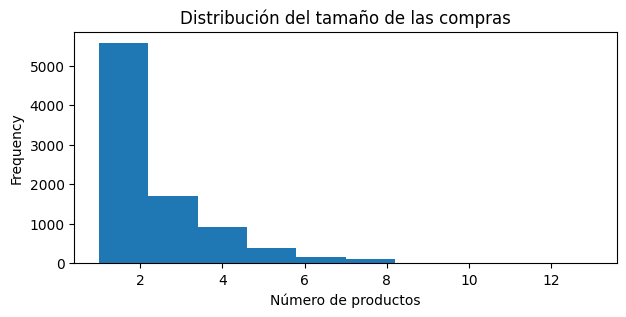

In [ ]:
# Distribución del número de ítems por compra
display(df.groupby('Pedido')['Producto'].size().describe(percentiles=[.25, .5, .75, .9]))

fig, ax = plt.subplots(figsize=(7, 3))
df.groupby('Pedido')['Producto'].size().plot.hist(ax=ax)
ax.set_title('Distribución del tamaño de las compras');
ax.set_xlabel('Número de productos');

# Itemsets

In [ ]:
# Identificación de itemsets frecuentes
# ==============================================================================
soporte = 30 / transacciones_encoded.shape[0]
print(f"Soporte mínimo: {soporte}")
itemsets = apriori(transacciones_encoded, min_support=soporte, use_colnames=True)
itemsets.sort_values(by='support', ascending=False)

Soporte mínimo: 0.003386004514672686


,support,itemsets
36,0.20,(PECHUGA DE PAVO BALANCE 250GR)
8,0.15,(CHORIZO PAVO 200GR MARCA JAL)
16,0.12,(JAMON DE PAVO VIRGINIA MARCA JAL 290 GR)
33,0.11,(PECHUG DE PAVO VIRGINIA 250GR MARCA JAL)
56,0.11,(SALCHICHA DE PAVO 500G BALANCE SRF)
...,...,...
164,0.00,"(JAMON REAL 300 GRS SRF, SALCHICHA VIENA BALAN..."
211,0.00,"(SALCHICHA BOTANERA PAVO 500GR SRF, PECHUGA DE..."
180,0.00,"(JAMON SERRANO ESPAÃOL 100GR TGM, PECHUGA DE ..."
181,0.00,"(JAMON VIRGINIA DE PAVO 1 KG, TOCINO 250GR MAR..."


# Filtrado

In [ ]:
# Top 10 itemsets con mayor soporte
# ==============================================================================
itemsets.sort_values(by='support', ascending=False).head(10)

,support,itemsets
36,0.20,(PECHUGA DE PAVO BALANCE 250GR)
8,0.15,(CHORIZO PAVO 200GR MARCA JAL)
16,0.12,(JAMON DE PAVO VIRGINIA MARCA JAL 290 GR)
33,0.11,(PECHUG DE PAVO VIRGINIA 250GR MARCA JAL)
56,0.11,(SALCHICHA DE PAVO 500G BALANCE SRF)
83,0.09,(TOCINO 250GR MARCA JAL)
19,0.08,(JAMON REAL DE PAVO 300 G MARCA HID)
18,0.08,(JAMON REAL 300 GRS SRF)
34,0.08,(PECHUGA DE PAVO 250GR SRF)
65,0.06,(SALCHICHA PARA ASAR 800GR CHX)


In [ ]:
# Top 10 itemsets con al menos 1 items, ordenados por soporte
itemsets['n_items'] = itemsets['itemsets'].apply(lambda x: len(x))
itemsets.query('n_items >= 1 ').sort_values('support', ascending=False).head(10)

,support,itemsets,n_items
36,0.20,(PECHUGA DE PAVO BALANCE 250GR),1
8,0.15,(CHORIZO PAVO 200GR MARCA JAL),1
16,0.12,(JAMON DE PAVO VIRGINIA MARCA JAL 290 GR),1
33,0.11,(PECHUG DE PAVO VIRGINIA 250GR MARCA JAL),1
56,0.11,(SALCHICHA DE PAVO 500G BALANCE SRF),1
83,0.09,(TOCINO 250GR MARCA JAL),1
19,0.08,(JAMON REAL DE PAVO 300 G MARCA HID),1
18,0.08,(JAMON REAL 300 GRS SRF),1
34,0.08,(PECHUGA DE PAVO 250GR SRF),1
65,0.06,(SALCHICHA PARA ASAR 800GR CHX),1


In [ ]:
# Top 10 itemsets con al menos 2 items, ordenados por soporte
itemsets['n_items'] = itemsets['itemsets'].apply(lambda x: len(x))
itemsets.query('n_items >= 2').sort_values('support', ascending=False).head(10)

,support,itemsets,n_items
212,0.05,"(SALCHICHA DE PAVO 500G BALANCE SRF, PECHUGA D...",2
101,0.05,"(CHORIZO PAVO 200GR MARCA JAL, JAMON DE PAVO V...",2
110,0.03,"(CHORIZO PAVO 200GR MARCA JAL, PECHUGA DE PAVO...",2
107,0.02,"(CHORIZO PAVO 200GR MARCA JAL, PECHUG DE PAVO ...",2
126,0.02,"(CHORIZO PAVO 200GR MARCA JAL, TOCINO 250GR MA...",2
111,0.02,"(CHORIZO PAVO 200GR MARCA JAL, SALCHICHA DE PA...",2
155,0.02,"(TOCINO 250GR MARCA JAL, JAMON DE PAVO VIRGINI...",2
168,0.02,"(JAMON REAL DE PAVO 300 G MARCA HID, PECHUGA D...",2
230,0.01,"(SALCHICHA PARA ASAR 800GR CHX, TOCINO 250GR M...",2
150,0.01,"(SALCHICHA PARA ASAR 800GR CHX, JAMON DE PAVO ...",2


In [ ]:
# Top 10 itemsets con al menos 2 items, ordenados por soporte
itemsets['n_items'] = itemsets['itemsets'].apply(lambda x: len(x))
itemsets.query('n_items >= 3').sort_values('support', ascending=False).head(10)

,support,itemsets,n_items
239,0.01,"(CHORIZO PAVO 200GR MARCA JAL, TOCINO 250GR MA...",3
243,0.01,"(CHORIZO PAVO 200GR MARCA JAL, SALCHICHA DE PA...",3
237,0.01,"(CHORIZO PAVO 200GR MARCA JAL, SALCHICHA PAVO ...",3
238,0.01,"(CHORIZO PAVO 200GR MARCA JAL, SALCHICHA TURKE...",3
236,0.01,"(CHORIZO PAVO 200GR MARCA JAL, SALCHICHA PARA ...",3
235,0.01,"(CHORIZO PAVO 200GR MARCA JAL, SALCHICHA JUMBO...",3
248,0.00,"(TOCINO 250GR MARCA JAL, SALCHICHA TURKEY LINE...",3
249,0.00,"(SALCHICHA DE PAVO 500G BALANCE SRF, JAMON REA...",3
242,0.00,"(CHORIZO PAVO 200GR MARCA JAL, TOCINO 250GR MA...",3
241,0.00,"(CHORIZO PAVO 200GR MARCA JAL, SALCHICHA JUMBO...",3


In [ ]:
# Top 10 itemsets con al menos 2 items, ordenados por soporte
# ==============================================================================
itemsets['n_items'] = itemsets['itemsets'].apply(lambda x: len(x))
itemsets.query('n_items >= 4').sort_values('support', ascending=False).head(10)

,support,itemsets,n_items
250,0.00,"(CHORIZO PAVO 200GR MARCA JAL, TOCINO 250GR MA...",4


# Reglas de asociación

In [ ]:
# Identificación de itemsets frecuentes
soporte = 30 / transacciones_encoded.shape[0]
itemsets_frecuentes = apriori(transacciones_encoded, min_support=soporte, use_colnames=True)

# Crear reglas de associación (confianza mínima del 70%)
confianza = 0.7 # confianza mínima del 70% para que una regla sea selecionada
reglas = association_rules(itemsets_frecuentes, metric="confidence", min_threshold=0.7)
print(f"Número de reglas generadas: {len(reglas)}")
reglas.sort_values(by='confidence').head(6)

Número de reglas generadas: 3


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,"(TOCINO 250GR MARCA JAL, SALCHICHA TURKEY LINE...",(JAMON DE PAVO VIRGINIA MARCA JAL 290 GR),0.01,0.12,0.00,0.73,6.32,0.00,3.31,0.85
0,"(CHORIZO PAVO 200GR MARCA JAL, SALCHICHA TURKE...",(JAMON DE PAVO VIRGINIA MARCA JAL 290 GR),0.01,0.12,0.01,0.86,7.44,0.01,6.48,0.87
2,"(CHORIZO PAVO 200GR MARCA JAL, TOCINO 250GR MA...",(JAMON DE PAVO VIRGINIA MARCA JAL 290 GR),0.00,0.12,0.00,0.97,8.34,0.00,27.40,0.88


# Filtrado de reglas

In [ ]:
# Seleccionar reglas que tienen "JAMON DE PAVO VIRGINIA MARCA JAL 290 GR" en el consecuente
mask = reglas['consequents'].map(lambda x: 'JAMON DE PAVO VIRGINIA MARCA JAL 290 GR' in x)
reglas.loc[mask]


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,"(SALCHICHA TURKEY LINE 1KG MARCA JAL, CHORIZO ...",(JAMON DE PAVO VIRGINIA MARCA JAL 290 GR),0.01,0.12,0.01,0.86,7.44,0.01,6.48,0.87
1,"(SALCHICHA TURKEY LINE 1KG MARCA JAL, TOCINO 2...",(JAMON DE PAVO VIRGINIA MARCA JAL 290 GR),0.01,0.12,0.00,0.73,6.32,0.00,3.31,0.85
2,"(SALCHICHA TURKEY LINE 1KG MARCA JAL, CHORIZO ...",(JAMON DE PAVO VIRGINIA MARCA JAL 290 GR),0.00,0.12,0.00,0.97,8.34,0.00,27.40,0.88


In [ ]:
antecedents = reglas.loc[mask, 'antecedents'].to_list()
set().union(*antecedents)

{'CHORIZO PAVO 200GR MARCA JAL',
 'SALCHICHA TURKEY LINE 1KG MARCA JAL',
 'TOCINO 250GR MARCA JAL'}

import session_info
session_info.show(html=False)